# Bienici Webscraping

## Venkat JAYANARASIMHAN

In [161]:
#Importing required libraries

from selenium import webdriver #For retrieving informations from website through chrome browser
import pandas as pd 
import time
import numpy as np
import os
from os.path import dirname, join

In [162]:
#Reference: https://www.youtube.com/watch?v=Xjv1sY630Uc
#Reference: https://github.com/swaroophumane/Python_Selenium_WebScraping_Housing.com/blob/master/1.%20Selenium%20Webscraping%20-%20Housing.com.py

#Setting up the web driver

#Defining the path of the chromedriver application
path = "C:\Program Files (x86)\chromedriver.exe" 

#Assigning chrome as the desired browser (Note you can use any other brower also)
driver = webdriver.Chrome(path)

#Opening the website using get method
driver.get("https://www.bienici.com/recherche/achat/tourcoing-59200,roubaix-59100,croix-59170,mouvaux-59420")

#Getting the title of the website
print(driver.title)

#Closing the webpage, you can also use .quit method
#driver.close()

Achat immobilier Tourcoing, Roubaix, Croix, … - Bien’ici


In [163]:
#Creating lists to store our scraped data

details_list = []
address_list = []
price_list = []
reference_list = []
img_list = []

In [164]:
#Using click method of selenium to go to the List view page

driver.find_element_by_xpath('//*[@id="searchSideHeader"]/div/div[2]/div/div/div/div[2]').click()

In [165]:
#Getting the number of pages of data present for our search results

p = driver.find_elements_by_xpath('//*[@id="searchResultsContainer"]/div[3]/div/div[2]') #Selects the bottom most page numbers element

ph=[]                                                                                    #Creating an empty list to store the page numbers

for i in p:                                                                              #Performing for loop to get all the text mentioned in this element (1 to 11)
    s = i.text                                                                           #Extracts the text from each element
    s = s.replace('\n'," ")                                                              #Replaces new line with a space
    ph = s.split(" ")                                                                    #Now 1 to 11 is a single string, splitting it into separate individual strings
    
for k in range(len(ph)):
    ph[k] = int(ph[k])                                                                   #Converting all the strings data type to integer format
print(ph)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [166]:
#Getting the data into our lists

for page_num in ph:                                                                         #Creating for loop to loop over all the pages in the website
    
    driver.implicitly_wait(60)                                                              #Waits for 60 seconds
    
    details = driver.find_elements_by_class_name('descriptionTitle')                        #Assigning Description Title element to details variable
    
    address = driver.find_elements_by_class_name('descriptionTitleAddress')                 #Assigning Address element to address variable
    
    price = driver.find_elements_by_class_name('thePrice')                                  #Assigning Price element to price variable
       
                                                                                            #Appending or adding the values stored in the above variables to our desired list
    for a in details:
        details_list.append(a.text)                                                         #Extracting the text from the element and appending the same in our list
    
    for b in address:
        address_list.append(b.text)                                                         #Extracting the text from the element and appending the same in our list
        
    for c in price:
        if c.text != "":                                                                    #Checks if price value is not empty
            price_list.append(c.text)                                                       #Extracting the text from the element and appending the same in our list
                
    if page_num == ph[-1]:                                                                  #Checks if page_num equals to last page i.e. 11
        break
    else:
        pageiterator = f'//*[@id="searchResultsContainer"]/div[3]/div/div[2]/a[{page_num}]' #Creating a variable which links to the corresponding page number element in the search container element
        time.sleep(10)
        driver.find_element_by_xpath(pageiterator).click()                                  #Clicks on the element based on the page num

In [167]:
#Closing the web driver

driver.quit()

In [168]:
#Converting the lists into dictionary

data_dict = {'category' : details_list,'address' : address_list, 'price' : price_list}

In [169]:
#Changing the default settings of column width of pandas dataframe to read in data of greater length

pd.options.display.max_colwidth = 250

In [170]:
#Counting the length of the array in each values of the dictionary

print(len(details_list),len(address_list),len(price_list),len(img_list))

268 268 267 0


In [171]:
#Converting Dictionary into Pandas DataFrame

data = pd.DataFrame.from_dict(data_dict, orient='index')
data = data.transpose()
data

,category,address,price
0,Appartement 2 pièces 48 m²\nTourcoing 59200,Tourcoing 59200,105 000 €
1,Maison 5 pièces 97 m²\nTourcoing 59200 (Brun Pain - Francs - Clinquet),Tourcoing 59200 (Brun Pain - Francs - Clinquet),303 000 €
2,L'ALLEE MY ART (appartements neufs 2 à 4 pièces)\nTourcoing 59200 (Blanche Porte - Flocon),Tourcoing 59200 (Blanche Porte - Flocon),172 000 à 286 000 €
3,"PARK SIDE (appartement neuf 2 pièces, 42 m²)\nTourcoing 59200 (Fosses aux Chênes - Alma Gare)",Tourcoing 59200 (Fosses aux Chênes - Alma Gare),121 500 €
4,L'OREE DE BARBIEUX (appartements neufs 3 à 4 pièces)\nCroix 59170 (Saint-Pierre),Croix 59170 (Saint-Pierre),255 000 à 334 000 €
...,...,...,...
263,Maison 5 pièces\nTourcoing 59200,Tourcoing 59200,189 500 €
264,Maison 6 pièces\nTourcoing 59200,Tourcoing 59200,128 500 €
265,,Tourcoing 59200 (Brun Pain - Francs - Clinquet),à partir de 149 000 €
266,,Tourcoing 59200,346 500 €


## Cleaning the scrapped data

In [172]:
#Checking the dataset types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  268 non-null    object
 1   address   268 non-null    object
 2   price     267 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [173]:
#Checking null values

data.isna().sum()

category    0
address     0
price       1
dtype: int64

In [174]:
#Dropping null value row

data = data.dropna()

In [175]:
#Reconfirming the null values

data.isna().sum()

category    0
address     0
price       0
dtype: int64

In [176]:
#Checking the dataset types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  267 non-null    object
 1   address   267 non-null    object
 2   price     267 non-null    object
dtypes: object(3)
memory usage: 8.3+ KB


In [184]:
#Extracting numeric value from price column

data['price'] = data['price'].astype('str').copy()
data['price'] = data['price'].str.replace(' ','').copy()                #Replaces the space with no space
data['price'] = data['price'].str.extract('(\d+)', expand=False).copy() #Extracts only numbers - Numbers written continuously (+)

#Converting price column to int
data['price'] = data['price'].astype('int').copy()

<ipython-input-184-93faab493d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype('str').copy()
<ipython-input-184-93faab493d6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].str.replace(' ','').copy()                #Replaces the space with no space
<ipython-input-184-93faab493d6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [185]:
#Extracting numeric pincode value from address column

data['pincode'] = data['address'].str.extract('(\d+)', expand=False)

#Converting pincode column to int
data['pincode'] = data['pincode'].astype('int').copy()

<ipython-input-185-e30b705e8775>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pincode'] = data['address'].str.extract('(\d+)', expand=False)
<ipython-input-185-e30b705e8775>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pincode'] = data['pincode'].astype('int').copy()


In [186]:
#Extracting city text from address column

data['city'] = data['address'].transform(lambda t: t.str.split(' ',1).str[0]) #Splitting the string based on space delimiter, adding next line for the other half of the string and the seleting the first half of the string

<ipython-input-186-70d83383146c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['address'].transform(lambda t: t.str.split(' ',1).str[0]) #Splitting the string based on space delimiter, adding next line for the other half of the string and the seleting the first half of the string


In [187]:
#Extracting street text from address column

data['street'] = data['address'].transform(lambda t: t.str.split('(',1).str[1]) #Splitting the string based on ( delimiter, adding next line for the other half of the string and the seleting the first half of the string
data['street'] = data['street'].str.replace(')','')                             #Removing ) from the string

<ipython-input-187-0f0b45c03506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['street'] = data['address'].transform(lambda t: t.str.split('(',1).str[1]) #Splitting the string based on ( delimiter, adding next line for the other half of the string and the seleting the first half of the string
<ipython-input-187-0f0b45c03506>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['street'] = data['street'].str.replace(')','')                             #Removing ) from the string


In [188]:
#Creating type variable based on category column

data['type'] = data['category'].transform(lambda t: t.str.split(' ',1).str[0]) #Splitting the string based on space delimiter, adding next line for the other half of the string and the seleting the first half of the string

<ipython-input-188-87c4e8afd066>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = data['category'].transform(lambda t: t.str.split(' ',1).str[0]) #Splitting the string based on space delimiter, adding next line for the other half of the string and the seleting the first half of the string


In [189]:
#Extracting numeric room number value from category column

data['nbr_rooms'] = data['category'].str.extract('(\d+)', expand=False)

#Converting room numbers column to float
data['nbr_rooms'] = data['nbr_rooms'].astype('float').copy()

<ipython-input-189-2bf32d657399>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nbr_rooms'] = data['category'].str.extract('(\d+)', expand=False)
<ipython-input-189-2bf32d657399>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nbr_rooms'] = data['nbr_rooms'].astype('float').copy()


In [191]:
#Extracting numeric area value from category column

data['area'] = data['category'].transform(lambda t: t.str.split('pièce').str[1]) #Splitting the string based on piece text, adding next line for the other half of the string and the seleting the first half of the string
data['area'] = data['area'].str.extract('(\d+)', expand=False)                   #Extracting the numbers
data['area'] = data['area'].astype('float').copy()                               #Converting to float type
data['area'] = np.where(data['area'] < 1000,data['area'],np.nan)                #Where area is less than 1000, mentiones the corresponding area else mentions nan

<ipython-input-191-d0c838c9cbc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['area'] = data['category'].transform(lambda t: t.str.split('pièce').str[1]) #Splitting the string based on piece text, adding next line for the other half of the string and the seleting the first half of the string
<ipython-input-191-d0c838c9cbc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['area'] = data['area'].str.extract('(\d+)', expand=False)                   #Extracting the numbers
<ipython-input-191-d0c8

In [192]:
#Selecting only Maison and Appartement type accomadation for the analysis

data = data[(data['type'] == "Maison") | (data['type'] =="Appartement")]

In [193]:
#Saving dataframe to csv file

data.to_csv(join(os.path.dirname("__file__"), "bienici_web_scrapping.csv"))

## Processing the Data

In [199]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
#Reading our csv file

df = pd.read_csv(r"C:\Users\vjayanarasimhan\OneDrive - IESEG\Venkat_Jayanarasimhan\MSc Big Data Analytics For Business\1 Course Modules\1 Semester\07 Financial Programming - Python\Individual Project\bienici_web_scrapping.csv")

In [201]:
#Removing the unwanted column

df = df.drop(df.columns[0],axis=1) #Selecting the column through column index

In [202]:
#Checking the dataset & its data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   218 non-null    object 
 1   address    218 non-null    object 
 2   price      218 non-null    int64  
 3   pincode    218 non-null    int64  
 4   city       218 non-null    object 
 5   street     181 non-null    object 
 6   type       218 non-null    object 
 7   nbr_rooms  218 non-null    float64
 8   area       207 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 15.5+ KB


In [203]:
#Checking the null values

df.isna().sum()

category      0
address       0
price         0
pincode       0
city          0
street       37
type          0
nbr_rooms     0
area         11
dtype: int64

In [204]:
#Dropping null value rows from the Area column

df = df.dropna(subset=['area'], how='any', axis=0) #subset defines the column, how defines any or all null values condition, axis 0 defines rows and 1 defines column

In [205]:
#Replacing the null values in street column by 'Missing Data' text

df['street'] = df['street'].fillna('Missing Data')

In [206]:
#Rechecking the missing values

df.isnull().sum()

category     0
address      0
price        0
pincode      0
city         0
street       0
type         0
nbr_rooms    0
area         0
dtype: int64

#### Adding additional metrics for analysis

In [207]:
#Adding Price Per Square Meter

df['price_sqm'] = round(df['price'] / df['area'],2)

In [208]:
#Adding Population feature & converting into integer type

df['population'] = np.where(df.city == "Tourcoing",97368, #else
                   np.where(df.city == "Roubaix",96990,   #else
                   np.where(df.city == "Croix",21041,     #else
                   np.where(df.city == "Mouvaux",13151, "0"))))

df['population'] = df['population'].astype(int)

In [209]:
#Adding Area Feature & converting into integer type

df['city_area'] =  np.where(df.city == "Tourcoing",15.2, #else
                   np.where(df.city == "Roubaix",13.2,   #else
                   np.where(df.city == "Croix",4.4,      #else
                   np.where(df.city == "Mouvaux",4.2, "0"))))

df['city_area'] = df['city_area'].astype(float)

In [210]:
#Adding Population Density Feature

df['population_density'] = round(df.population / df.city_area, 2) #Rounding to 2 decimals

In [211]:
#Adding Median Disposable Income per Consumption Unit feature & converting into integer type

df['median_income'] = np.where(df.city == "Tourcoing",16770,    #else
                      np.where(df.city == "Roubaix",13590,      #else
                      np.where(df.city == "Croix",21250,        #else
                      np.where(df.city == "Mouvaux",26320, "0"))))

df['median_income'] = df['median_income'].astype(int)

In [212]:
#Adding Unemployment Rate Feature & converting into integer type

df['unemployment_rate'] = np.where(df.city == "Tourcoing",23.2,        #else
                          np.where(df.city == "Roubaix",31.7,          #else
                          np.where(df.city == "Croix",14.3,            #else
                          np.where(df.city == "Mouvaux",11.8, "0"))))

df['unemployment_rate'] = df['unemployment_rate'].astype(float)

In [213]:
#Statistical Summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,207.0,195141.801932,158409.509446,32600.00,108000.00,150000.00,211450.00,1250000.00
pincode,207.0,59190.628019,74.129851,59100.00,59170.00,59200.00,59200.00,59420.00
nbr_rooms,207.0,3.922705,1.556014,1.00,3.00,4.00,5.00,9.00
area,207.0,97.584541,54.333842,19.00,66.00,87.00,104.00,480.00
price_sqm,207.0,2017.878406,844.590117,269.66,1428.57,1794.64,2473.76,4629.63
population,207.0,86425.951691,27525.732509,13151.00,96990.00,97368.00,97368.00,97368.00
city_area,207.0,13.281159,3.652899,4.20,13.20,15.20,15.20,15.20
population_density,207.0,6283.821304,1044.559766,3131.19,6405.79,6405.79,6405.79,7347.73
median_income,207.0,17012.222222,3124.322045,13590.00,16770.00,16770.00,16770.00,26320.00
unemployment_rate,207.0,23.715942,5.484655,11.80,23.20,23.20,23.20,31.70


In [214]:
#Grouping City & Type of Accomodation for comparing the price

df.pivot_table(index = 'city', columns = 'type', values = 'price_sqm')

type,Appartement,Maison
city,,
Croix,2642.318889,2555.400000
Mouvaux,3439.648000,3145.690000
Roubaix,2087.526087,1672.139130
Tourcoing,2079.374167,1704.092603


## Presenting the Data

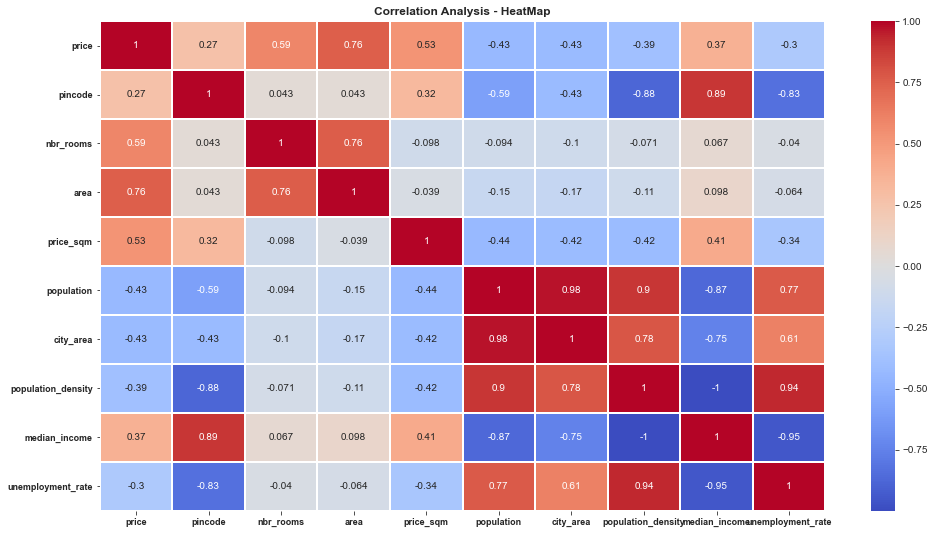

In [215]:
#Reference: https://pythonbasics.org/seaborn-heatmap/

#Plotting a heatmap for the correlation between numeric variables

plt.figure(figsize=(18,10))                                         #Setting the chart size
sns.heatmap(df.corr(), cmap= 'coolwarm', annot=True, linewidth = 1) #Performing perason correlation, annot mentions the correlation value inside the heatmap, linewidth separates the heatmap values with line

plt.subplots_adjust(left=0.2, bottom=0.2)                           #Alligning the plot in the jupyter notebook

plt.title("Correlation Analysis - HeatMap", fontweight='bold')

plt.xticks(fontsize = 9, fontweight='bold')
plt.yticks(fontsize = 9, fontweight='bold')

plt.savefig("Correlation Analysis HeatMap.jpeg", dpi=400)           #Save image in High Resolution

plt.show()

#Inference:
# High Positive Correlation between,
#1) Price & Area
#2) Price & Number of Rooms
#3) Population & Area Of the City
#4) Population Density & Unemployment Rate
#5) Median Income & Pincode of the city

# High Negative Correlation between,
#1) Median Income & Population Density 
#2) Median Income & Unemployement Rate

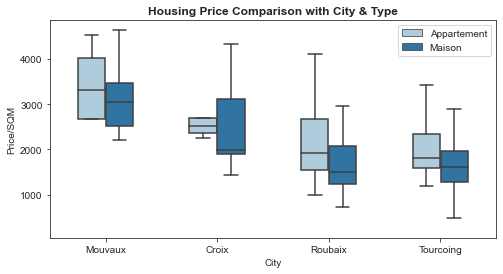

In [216]:
#Plotting Boxplot for Housing Price Vs City & Type of accomodation

plt.figure(figsize=(8,4))                                             #Fixing figure size
sns.set_style('ticks')                                                #Setting style to ticks
pal = sns.color_palette('Paired')                                     #Setting colour palette as Paired

sns.boxplot(data = df, x = 'city', y = 'price_sqm', hue = 'type', width=0.5, palette=pal, fliersize=0,
            order=["Mouvaux","Croix","Roubaix","Tourcoing"])          #filtersize = 0 given to not plot outliers

plt.title("Housing Price Comparison with City & Type", fontweight='bold')
plt.xlabel("City", size=10)
plt.ylabel("Price/SQM", size=10)
plt.legend(loc='upper right')


plt.savefig("Housing Price Comparison with City & Type.jpeg", dpi=400) #Save image in High Resolution

plt.show()

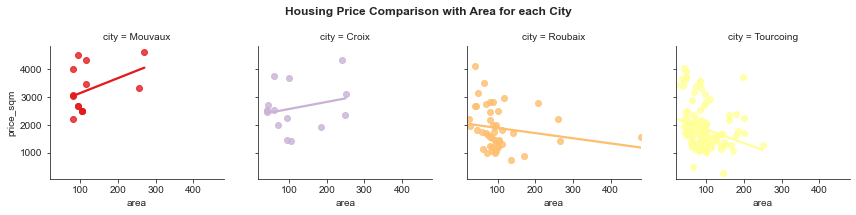

In [217]:
#Reference: https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/

#Plotting FacetGrid with RegPlot for Housing Price Vs Area for each City

pal = sns.color_palette('Paired_r')                                                      #Setting colour palette as Paired_r

grid = sns.FacetGrid(df, col = "city", hue = "city", col_wrap=4, palette=pal, margin_titles=True, col_order=["Mouvaux","Croix","Roubaix","Tourcoing"])
grid.map(sns.regplot, "area", "price_sqm", ci=None)

plt.subplots_adjust(top=0.8)                                                             #Aligning the title at the top
grid.fig.suptitle('Housing Price Comparison with Area for each City', fontweight='bold') #Giving Title
plt.subplots_adjust(wspace=0.2)                                                          #Adjusting the space between each graphs

plt.savefig("Housing Price Comparison with Area for each City.jpeg", dpi=400)            #Save image in High Resolution

plt.show()

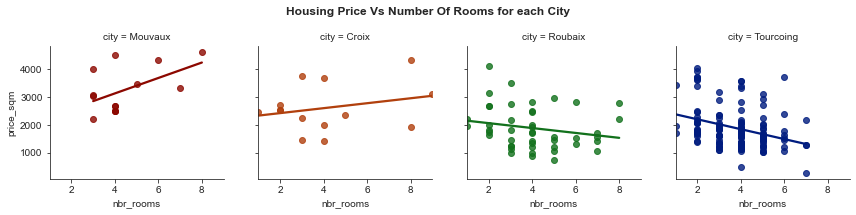

In [218]:
#Plotting FacetGrid with RegPlot for Housing Price Vs Number Of Rooms for each City

pal = sns.color_palette('dark')                                                       #Setting colour palette as Paired_r

grid = sns.FacetGrid(df, col = "city", hue = "city", col_wrap=4, palette=pal, col_order=["Mouvaux","Croix","Roubaix","Tourcoing"])
grid.map(sns.regplot, "nbr_rooms", "price_sqm", ci=None)

plt.subplots_adjust(top=0.8)                                                           #Aligning the title at the top
grid.fig.suptitle('Housing Price Vs Number Of Rooms for each City', fontweight='bold') #Giving Title
plt.subplots_adjust(wspace=0.2)                                                        #Adjusting the space between each graphs

plt.savefig("Housing Price Vs Number Of Rooms for each City.jpeg", dpi=400)            #Save image in High Resolution

plt.show()

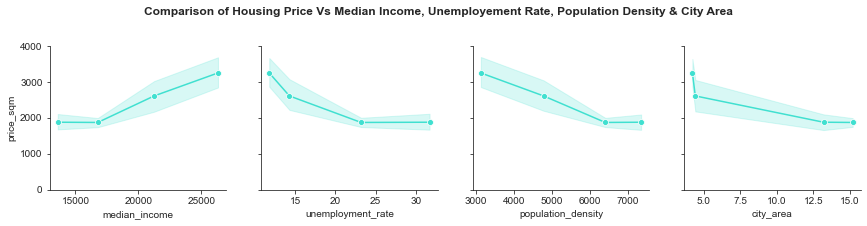

In [219]:
#Plotting PairGrid with LinePlot for Comparison of Housing Price Vs Median Income, Unemployement Rate, Population Density & City Area

grid = sns.PairGrid(df, y_vars=["price_sqm"], x_vars=["median_income", "unemployment_rate", "population_density", "city_area"],height=3)
grid.map(sns.lineplot, marker='o', color="turquoise")

grid.set(yticks=[0, 1000, 2000, 3000, 4000])                             #Fixing Y axis values
plt.subplots_adjust(wspace=0.2)                                          #Adjusting the space between each graphs

plt.subplots_adjust(left=0.05, top=0.8) #Aligning the title at the top
grid.fig.suptitle('Comparison of Housing Price Vs Median Income, Unemployement Rate, Population Density & City Area', fontweight='bold') #Giving Title

plt.savefig("Comparison of Housing Price Vs Fundamentals.jpeg", dpi=400) #Save image in High Resolution

plt.show()

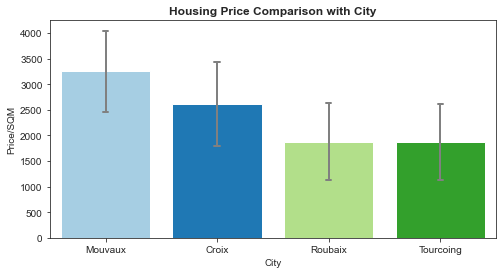

In [220]:
#Plotting Barplot for Comparing Housing Prices Vs City

plt.figure(figsize=(8,4))                                      #Fixing figure size
sns.set_style('ticks')                                         #Setting style to ticks
pal = sns.color_palette('Paired')                              #Setting colour palette as Paired

sns.barplot(data=df, x='city', y='price_sqm', palette = pal, order = ['Mouvaux', 'Croix', 'Roubaix','Tourcoing'],
            capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = 'sd')

plt.title("Housing Price Comparison with City", fontweight='bold')
plt.xlabel("City", size=10)
plt.ylabel("Price/SQM", size=10)


plt.savefig("Housing Price Comparison with City.jpeg", dpi=400) #Save image in High Resolution

plt.show()

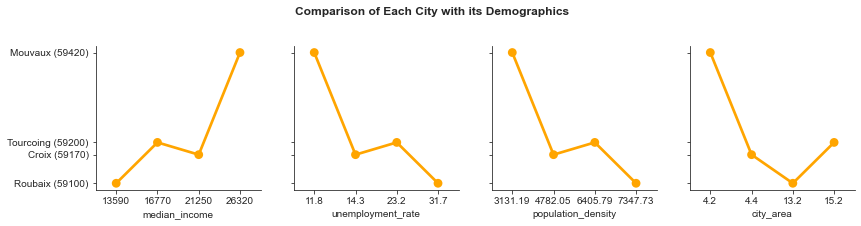

In [221]:
#Plotting Pointplot for Comparing Each City with its Demographics

grid = sns.PairGrid(df, y_vars=["pincode"], x_vars=["median_income", "unemployment_rate", "population_density", "city_area"],height=3)
grid.map(sns.pointplot, marker='o', color="Orange")

grid.set(yticks=[59420, 59170, 59200, 59100])                                         #Fixing Y axis values
plt.yticks([59420, 59170, 59200, 59100],['Mouvaux (59420)', 'Croix (59170)', 'Tourcoing (59200)', 'Roubaix (59100)'])
grid.set(ylabel=None)
plt.subplots_adjust(wspace=0.2)                                                       #Adjusting the space between each graphs

plt.subplots_adjust(left=0.11, top=0.8)                                               #Aligning the title at the top
grid.fig.suptitle('Comparison of Each City with its Demographics', fontweight='bold') #Giving Title

plt.savefig("Comparison of Each City with its Demographics.jpeg", dpi=400)            #Save image in High Resolution

plt.show()